In [ ]:
from random import randint
import time
import serial

In [ ]:

def generate_packets(n, payload_length):
    def generate_payload(payload_length):
        if not payload_length == -1:
            return "".join([str(randint(0, 9)) for _ in range(payload_length)])
        else:
            return "".join([str(randint(0, 9)) for _ in range(randint(1, 256))])
    
    time_of_generation = int(time.time())

    return ["SOT", f"TIME={time_of_generation}"] + [generate_payload(payload_length) for _ in range(n)] + ["EOT"], time_of_generation

In [ ]:
packets, _time = generate_packets(10, -1)
packets

In [ ]:
device = serial.Serial("COM8", 115200)

In [ ]:
def AT(device, command: str, timeout=10):
    start_time = time.time()
    device.write((command + "\n").encode())
    response = ""
    
    while "OK" not in response:
        response = device.read_all().decode()
        if "error" in response.lower():
            return "ERROR"
        if ((time.time()-start_time) > 10):
            return "TIMEOUT"

    return "OK"

In [ ]:
AT(device, "AT+SEND=eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee")

In [ ]:
device.close()

In [ ]:
response = device.read_all().decode()
response = response

In [ ]:
print(response)

In [ ]:
generate_packets(20, 50)

In [ ]:
import pandas as pd
import os

In [ ]:
l = os.listdir("./data/experiment datarates/")

df = pd.DataFrame()
for item in l:
    df[f"{item.split('.')[0]}"] = pd.read_csv(f"./data/experiment datarates/{item}")["AoI"]
df.index.name="Time"
df.index = df.index * 30

In [ ]:
l = [1,2,5,10,15,20,27]
df = pd.DataFrame()
for item in l:
    df[f"{item} dbm"] = pd.read_csv(f"./data/experiment txp/{item} db.csv")["AoI"]
df.index.name="Time"
df.index = df.index * 30

In [ ]:
l = [2,8,16,32,64,128,200,256]

df = pd.DataFrame()
for item in l:
    df[f"{item} bytes"] = pd.read_csv(f"./data/experiment payload/{item} byte.csv")["AoI"]
df.index.name="Time"
df.index = df.index * 30

In [ ]:
import numpy as np
from plotly import express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
avgs, stds = np.mean(df.to_numpy(), axis=0).astype(int), np.std(df.to_numpy(),axis=0).astype(int)
aggs = pd.DataFrame({"mean": avgs, "std": stds}, index=df.columns)
display(aggs)
ax = aggs.plot.bar()

ax.set_xticklabels(aggs.index.map(lambda x: x.split()[0]), rotation = 0)
ax.set_xlabel("Trasmission power (dbm)")
ax.set_ylabel("AoI (sec)")
plt.show()

ax = df.plot.line()
ax.set_ylabel("AoI (sec)")
plt.show()

In [37]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read data from a csv
df = pd.read_csv('./data/experiment one packet/run 3.csv')
df["Payload size"] = df["Payload size"] + 11
z = df.pivot_table("Average AOI", index="Tx Power", columns="Payload size")
z

Payload size,64,80,96,111,128,141,160,171,192
Tx Power,,,,,,,,,
10,9.833333,10.100000,9.966667,10.533333,10.366667,11.000000,11.100000,11.233333,11.600000
15,10.633333,10.666667,10.700000,10.633333,10.633333,9.966667,10.166667,11.600000,11.366667
20,9.966667,9.900000,10.166667,11.166667,10.500000,11.133333,10.900000,11.100000,11.466667
27,8.733333,9.933333,10.433333,10.666667,10.400000,11.300000,11.400000,10.266667,12.600000


In [63]:
from itertools import product
fix = "Payload size"
fix_value = df[fix].unique()
x = "Tx Power"

plot_break = len(fix_value)


ncols, nrows = 3,3

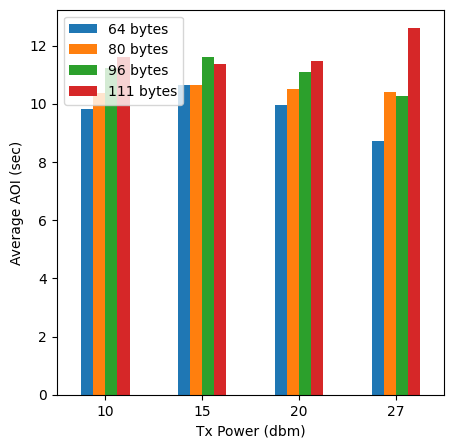

In [113]:
#define subplot layout
plt.rcParams['figure.figsize'] = [5,5]
pv = df.pivot(columns="Payload size", index="Tx Power", values="Average AOI")
pv[[64, 128, 171, 192]].plot(kind='bar')
legends = pv.columns.map(lambda x: f"{x} bytes")
plt.ylabel("Average AOI (sec)")
plt.xlabel("Tx Power (dbm)")
plt.xticks(rotation=0)
plt.legend(legends, loc='upper left', ncols=1)

In [ ]:
fix = "Payload size"
fix_value = 64
x = "Tx Power"

k = df[df[fix] == fix_value][[x, "Average AOI"]]
k.set_index(x, inplace=True)
k.plot.bar()
plt.title(f"Avg AOI for {fix}={fix_value}")

In [ ]:
plot = df.groupby("Tx Power")["Average AOI"].mean().to_frame().plot.bar()
plt.ylabel("Average AOI (secs)")
plt.xlabel("Tx Power (dbm)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby("Payload size")["Average AOI"].mean().to_frame()

In [ ]:
plot = df.groupby("Payload size")["Average AOI"].mean().to_frame().plot.bar()
plt.ylabel("Average AOI (secs)")
plt.xlabel("Payload size (bytes)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
df = pd.read_csv('./data/experiment one packet/run 3.csv')
df["Payload size"] = df["Payload size"] + 11
z = df.pivot_table("Average AOI", index="Tx Power", columns="Payload size")
z

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,8]
plot1, plot2 = np.meshgrid(z.columns, z.index)
axes = plt.axes(projection='3d')
axes.plot_surface(plot1, plot2, z, cmap="viridis", edgecolor='none', rstride=1, cstride=1, linewidth=2)
axes.set_xlabel('Payload size (bytes)')
axes.set_ylabel('Tx Power (dbm)')
axes.set_zlabel('Average AOI (sec)')
axes.set_title("Average AOI")
axes.yaxis.set_major_formatter('{x}')

plt.show()